<a href="https://colab.research.google.com/github/7330717512/Old_Car_price_prediction2/blob/main/Old_Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/car-data.csv')

In [ ]:
df.sample(10)

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
5700,2016,11798,Manual,28941,Diesel,20,68.9,2.0
10755,2019,28495,Manual,1950,Diesel,150,47.9,2.0
8053,2015,10995,Semi-Auto,44657,Petrol,20,61.4,1.4
5683,2016,14998,Semi-Auto,33784,Diesel,30,62.8,2.0
9813,2019,13490,Manual,3000,Petrol,150,52.3,1.0
9554,2017,10500,Manual,27643,Petrol,150,60.1,1.2
167,2019,19995,Manual,4407,Diesel,145,50.4,1.6
1636,2019,13995,Manual,13144,Diesel,145,57.7,1.6
7261,2017,10191,Manual,35443,Petrol,145,60.1,1.2
12562,2017,7490,Manual,22331,Petrol,150,64.2,1.0


In [ ]:
df.shape

(15157, 8)

In [ ]:
df.isnull().sum()

year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [ ]:
df["car_age"] = 2021 - df["year"]

In [ ]:
df.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_age
0,2019,25000,Automatic,13904,Diesel,145,49.6,2.0,2
1,2019,26883,Automatic,4562,Diesel,145,49.6,2.0,2
2,2019,20000,Manual,7414,Diesel,145,50.4,2.0,2
3,2019,33492,Automatic,4825,Petrol,145,32.5,2.0,2
4,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,2


In [ ]:
df.year.value_counts()

2019    4669
2017    2947
2016    2647
2018    1509
2015    1153
2020    1046
2014     580
2013     315
2012      80
2011      57
2010      41
2009      31
2008      27
2007      20
2006      16
2005       8
2001       4
2004       3
2003       2
2002       1
2000       1
Name: year, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
year_counts = pd.DataFrame(data = df.year.value_counts())

In [ ]:
year_counts.reset_index(inplace=True)


In [ ]:
year_counts.rename(columns={'index':'year','year':'counts'},inplace=True)
year_counts

,year,counts
0,2019,4669
1,2017,2947
2,2016,2647
3,2018,1509
4,2015,1153
5,2020,1046
6,2014,580
7,2013,315
8,2012,80
9,2011,57


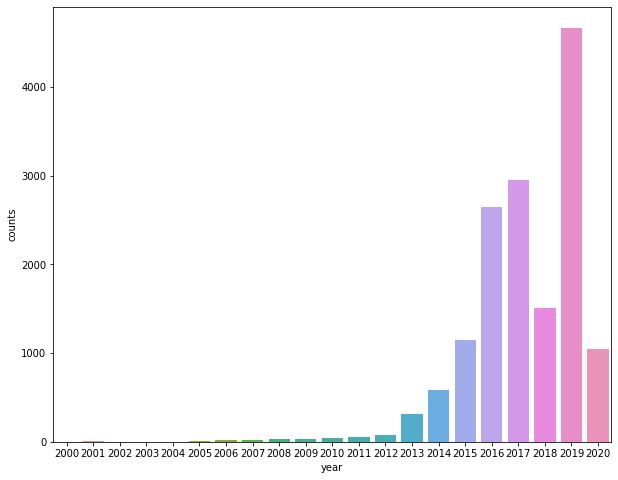

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x='year',y='counts',data=year_counts)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


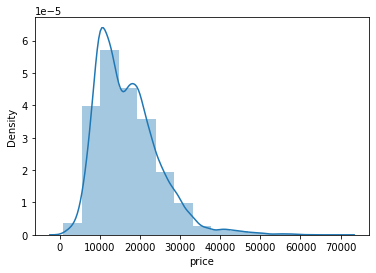

In [ ]:
sns.distplot(df["price"],bins=15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


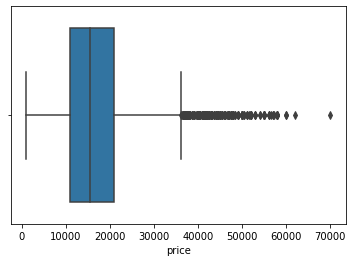

In [ ]:
sns.boxplot(df["price"])

In [ ]:
df[df["price"]>df["price"].quantile(.99)]

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_age
11849,2019,43995,Automatic,2927,Other,150,30.4,2.0,2
13391,2020,47000,Automatic,1001,Diesel,145,33.6,2.0,1
13397,2019,52999,Semi-Auto,3365,Diesel,145,29.4,2.0,2
13401,2019,46795,Semi-Auto,6280,Diesel,145,33.6,2.0,2
13402,2020,43495,Semi-Auto,2000,Diesel,150,33.6,2.0,1
...,...,...,...,...,...,...,...,...,...
15123,2019,57991,Automatic,10288,Diesel,260,33.2,2.0,2
15124,2019,57991,Automatic,6739,Diesel,260,33.2,2.0,2
15125,2019,57991,Automatic,7259,Diesel,260,33.2,2.0,2
15126,2019,57991,Automatic,7486,Diesel,260,33.2,2.0,2


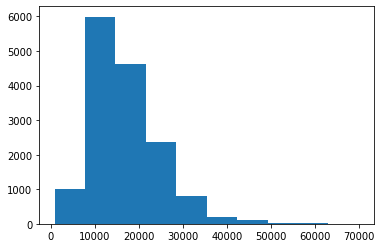

In [ ]:
plt.hist(df["price"])
plt.show()

In [ ]:
df.transmission.value_counts()

Manual       9417
Semi-Auto    3780
Automatic    1960
Name: transmission, dtype: int64

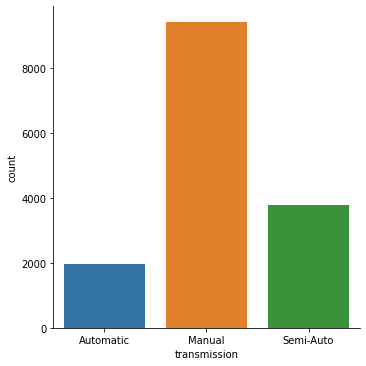

In [ ]:
sns.catplot(x='transmission',kind="count",data=df)

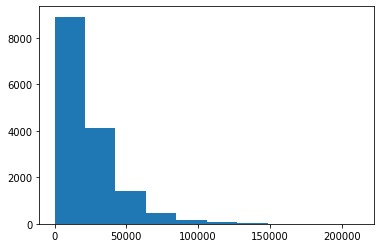

In [ ]:
plt.hist(df["mileage"])
plt.show()

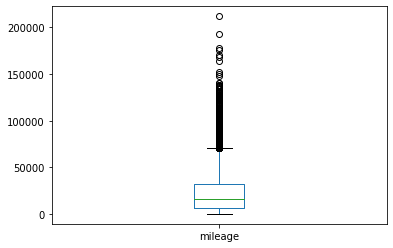

In [ ]:
df['mileage'].plot(kind='box')

In [ ]:
df[df["mileage"]>df["mileage"].quantile(.99)]

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_age
761,2010,4995,Manual,99000,Diesel,125,57.6,2.0,11
774,2004,1287,Manual,170000,Diesel,165,52.3,2.0,17
787,2013,6999,Manual,100000,Diesel,0,74.3,1.6,8
789,2010,7999,Manual,101000,Diesel,125,57.6,2.0,11
4394,2009,2999,Manual,101702,Diesel,20,68.9,1.6,12
...,...,...,...,...,...,...,...,...,...
15014,2008,2295,Manual,111000,Diesel,155,48.7,2.0,13
15015,2012,3995,Manual,110750,Diesel,20,67.3,1.6,9
15083,2016,8888,Automatic,108808,Diesel,125,58.9,2.0,5
15110,2012,6695,Manual,98000,Diesel,30,60.1,2.0,9


In [ ]:
df.fuelType.value_counts()

Petrol    8553
Diesel    6372
Hybrid     145
Other       87
Name: fuelType, dtype: int64

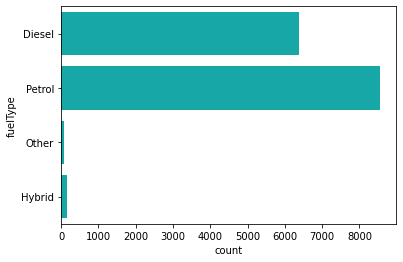

In [ ]:
sns.countplot(y='fuelType',data=df,color='c')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


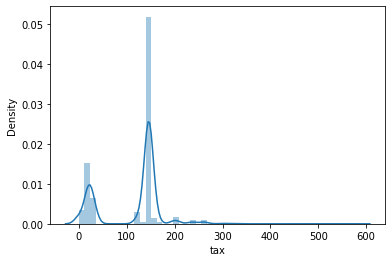

In [ ]:
sns.distplot(df['tax'])

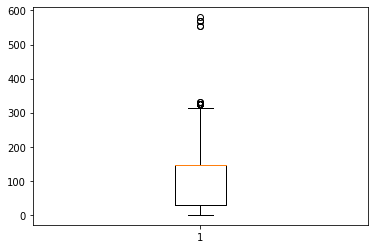

In [ ]:
plt.boxplot(df['tax'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


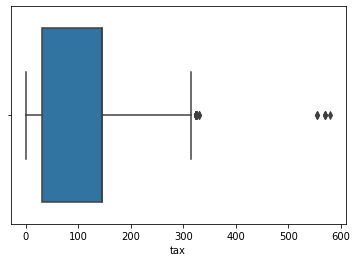

In [ ]:
sns.boxplot(df['tax'])

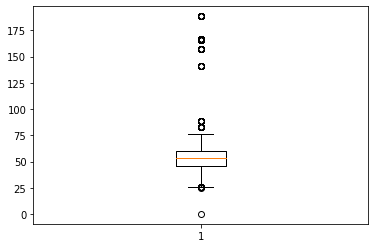

In [ ]:
plt.boxplot(df['mpg'])
plt.show()

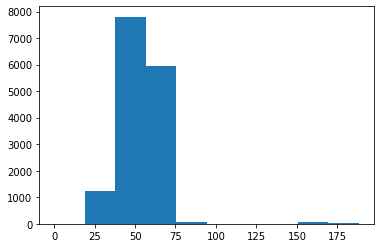

In [ ]:
plt.hist(df["mpg"],bins=10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


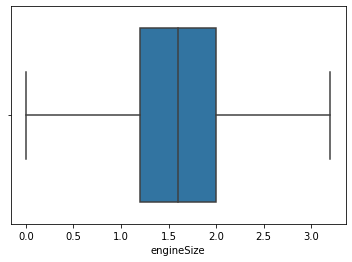

In [ ]:
sns.boxplot(df['engineSize'])

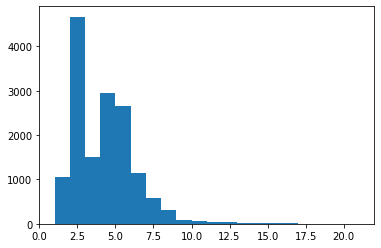

In [ ]:
plt.hist(df['car_age'],bins=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


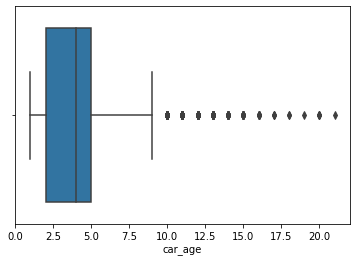

In [ ]:
sns.boxplot(df['car_age'])

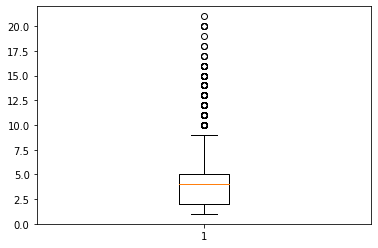

In [ ]:
plt.boxplot(df['car_age'])
plt.show()

In [ ]:
df = df.drop(['year'],axis=1)
df.head()

,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_age
0,25000,Automatic,13904,Diesel,145,49.6,2.0,2
1,26883,Automatic,4562,Diesel,145,49.6,2.0,2
2,20000,Manual,7414,Diesel,145,50.4,2.0,2
3,33492,Automatic,4825,Petrol,145,32.5,2.0,2
4,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,2


In [ ]:
df.shape

(15157, 8)

In [ ]:
df_dummy = pd.get_dummies(df[["transmission","fuelType"]],drop_first=True)

In [ ]:
df_f = pd.concat([df,df_dummy],axis=1)

In [ ]:
df_f.sample(5)

,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_age,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
1508,17998,Semi-Auto,12270,Petrol,160,44.1,2.0,6,0,1,0,0,1
3239,22992,Manual,4875,Petrol,145,47.9,1.5,2,1,0,0,0,1
3325,11490,Manual,26386,Diesel,0,74.3,1.6,5,1,0,0,0,0
14194,17495,Semi-Auto,23105,Diesel,125,60.1,2.0,5,0,1,0,0,0
11556,12990,Manual,53500,Diesel,145,53.3,2.0,6,1,0,0,0,0


In [ ]:
df_f = df_f.drop(["transmission","fuelType"],axis=1)

In [ ]:
df_f.head()

,price,mileage,tax,mpg,engineSize,car_age,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,25000,13904,145,49.6,2.0,2,0,0,0,0,0
1,26883,4562,145,49.6,2.0,2,0,0,0,0,0
2,20000,7414,145,50.4,2.0,2,1,0,0,0,0
3,33492,4825,145,32.5,2.0,2,0,0,0,0,1
4,22900,6500,150,39.8,1.5,2,0,1,0,0,1


In [ ]:
df_f.shape

(15157, 11)

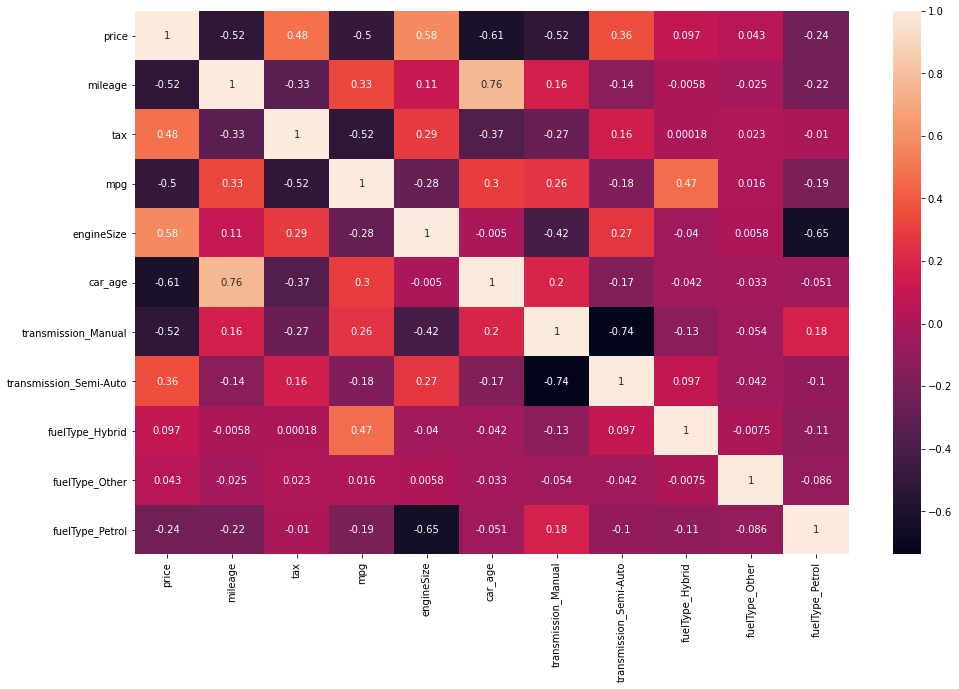

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df_f.corr(),annot=True)

In [ ]:
X=df_f.drop(["price"],axis=1)
X.head()

,mileage,tax,mpg,engineSize,car_age,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,13904,145,49.6,2.0,2,0,0,0,0,0
1,4562,145,49.6,2.0,2,0,0,0,0,0
2,7414,145,50.4,2.0,2,1,0,0,0,0
3,4825,145,32.5,2.0,2,0,0,0,0,1
4,6500,150,39.8,1.5,2,0,1,0,0,1


In [ ]:
y = df_f["price"]
y

0        25000
1        26883
2        20000
3        33492
4        22900
         ...  
15152     5990
15153     1799
15154     1590
15155     1250
15156     2295
Name: price, Length: 15157, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [ ]:
X_train.shape, X_test.shape

((12125, 10), (3032, 10))

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lin_reg.score(X_train,y_train)

0.8088051792693263

In [ ]:
lin_reg.score(X_test,y_test)

0.8024667352534736

In [ ]:
lin_reg_predict = lin_reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [ ]:
print("MAE:", mean_absolute_error(y_test,lin_reg_predict))
print("MSE:", mean_squared_error(y_test,lin_reg_predict))
print("RMSE:", np.sqrt(mean_squared_error(y_test,lin_reg_predict)))

MAE: 2229.378656119401
MSE: 11721969.7699928
RMSE: 3423.7362296171123


In [ ]:
r2_score(y_test,lin_reg_predict)

0.8024667352534735

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rfr.score(X_train,y_train)

0.9906640341744825

In [ ]:
rfr.score(X_test,y_test)

0.9390505865768396

In [ ]:
rfr_predict = rfr.predict(X_test)

In [ ]:
print("MAE:", mean_absolute_error(y_test,rfr_predict))
print("MSE:", mean_squared_error(y_test,rfr_predict))
print("RMSE:", np.sqrt(mean_squared_error(y_test,rfr_predict)))

MAE: 1214.2108700849474
MSE: 3616844.902360384
RMSE: 1901.8004370491622


In [ ]:
r2_score(y_test,rfr_predict)

0.9390505865768397

In [ ]:
import xgboost as xgb
xgboost = xgb.XGBRegressor(random_state=1,learning_rate=0.1)
xgboost.fit(X_train,y_train)

[05:31:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
xgboost.score(X_test,y_test)

0.9107738738779214

In [ ]:
xgboost.score(X_train,y_train)

0.9165396406880155

In [ ]:
xgb_predict = xgboost.predict(X_test)

In [ ]:
print("MAE:", mean_absolute_error(y_test,xgb_predict))
print("MSE:", mean_squared_error(y_test,xgb_predict))
print("RMSE:", np.sqrt(mean_squared_error(y_test,xgb_predict)))

MAE: 1583.1017656049503
MSE: 5294834.540595832
RMSE: 2301.050747070962


In [ ]:
r2_score(y_test,xgb_predict)

0.9107738738779214